In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import gc

# Load Data

In [4]:
names = ["stories_art-et-culture.csv",
         "stories_economie.csv",
         "stories_faits-divers.csv",
         "stories_marocains-du-monde.csv",
         "stories_medias.csv",
         "stories_orbites.csv",
         "stories_politique.csv",
         "stories_regions.csv",
         "stories_societe.csv",
         "stories_sport.csv",
         "stories_tamazight.csv"
        ]

data = pd.DataFrame()

for i in names:
    path = '/kaggle/input/hespress/'+i
    df = pd.read_csv(path, encoding='utf8')
    data = pd.concat([data, df,], ignore_index=True)

In [5]:
data.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11000 non-null  int64 
 1   id          11000 non-null  object
 2   title       11000 non-null  object
 3   date        11000 non-null  object
 4   author      11000 non-null  object
 5   story       11000 non-null  object
 6   topic       11000 non-null  object
dtypes: int64(1), object(6)
memory usage: 601.7+ KB


In [7]:
data.columns

Index(['Unnamed: 0', 'id', 'title', 'date', 'author', 'story', 'topic'], dtype='object')

In [8]:
data = data.drop(["Unnamed: 0" ,"id", "date"], axis = 1)

In [9]:
data.head(3)

,title,author,story,topic
0,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture


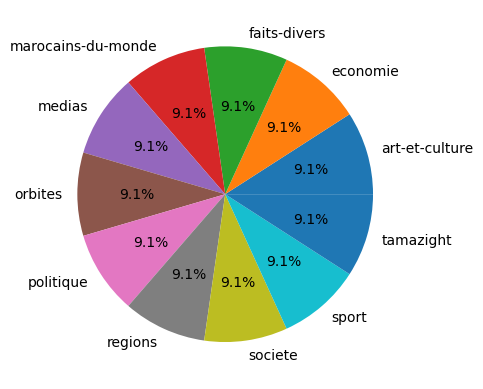

In [25]:
pie_data = data.groupby("topic").agg({"author":"count"}).reset_index()
plt.pie(pie_data.author, labels=pie_data.topic, autopct='%1.1f%%')
plt.show()

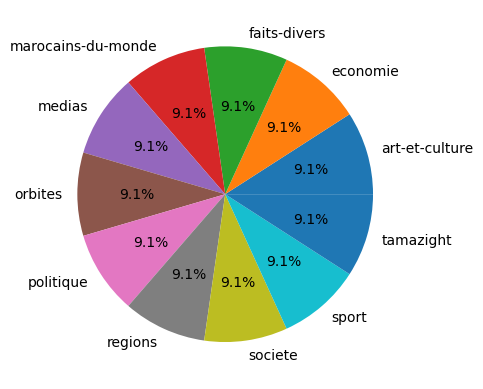

In [26]:
pie_data = data.groupby("topic").agg({"story":"count"}).reset_index()
plt.pie(pie_data.story, labels=pie_data.topic, autopct='%1.1f%%')
plt.show()

In [27]:
data["n_characters"] = data["story"].astype(str).apply(len)

In [28]:
data["n_words"] = data["story"].astype(str).apply(lambda x: len(x.split()))

In [29]:
data.head()

,title,author,story,topic,n_characters,n_words
0,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture,3868,622
1,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture,2464,381
2,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture,3056,516
3,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture,4921,771
4,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture,1238,200


Text(0, 0.5, 'number of characters')

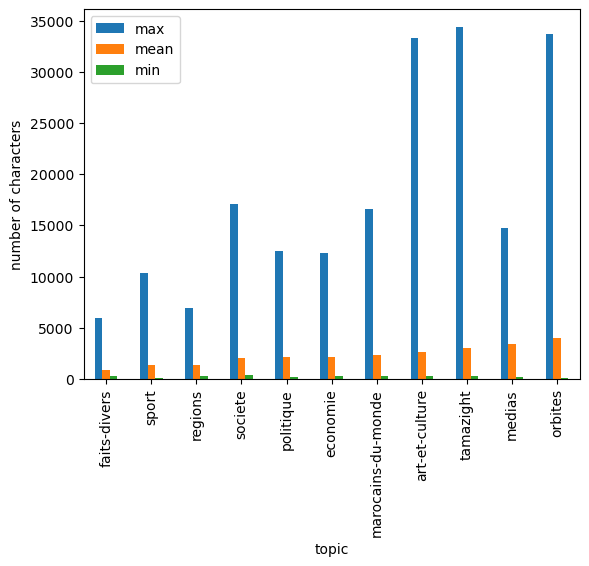

In [40]:
data.groupby("topic").n_characters.agg(["max", "mean", "min"]).sort_values("mean").plot(kind="bar")
plt.ylabel("number of characters")

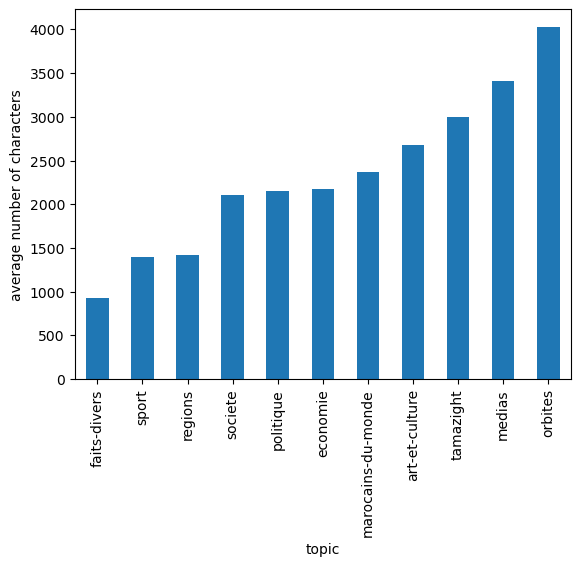

In [42]:
data.groupby("topic").n_characters.agg(["mean"]).sort_values("mean").plot(kind="bar")
plt.ylabel("average number of characters")
plt.legend().remove()

In [43]:
data.groupby("topic").n_characters.agg(["max", "mean", "min"]).sort_values("mean")

,max,mean,min
topic,,,
faits-divers,5933,928.050,256
sport,10388,1398.471,151
regions,6962,1422.024,274
societe,17113,2100.177,358
politique,12555,2150.037,225
economie,12354,2177.350,289
marocains-du-monde,16629,2373.735,256
art-et-culture,33330,2675.401,256
tamazight,34371,3000.346,285


Text(0, 0.5, 'number of words in a story')

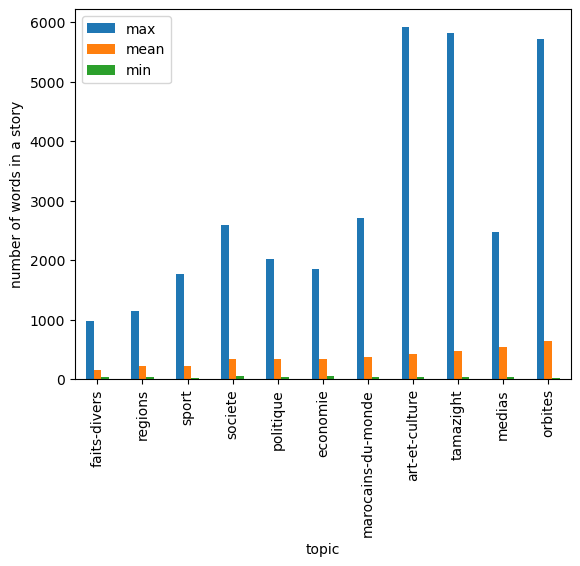

In [45]:
data.groupby("topic").n_words.agg(["max", "mean", "min"]).sort_values("mean").plot(kind="bar")
plt.ylabel("number of words in a story")

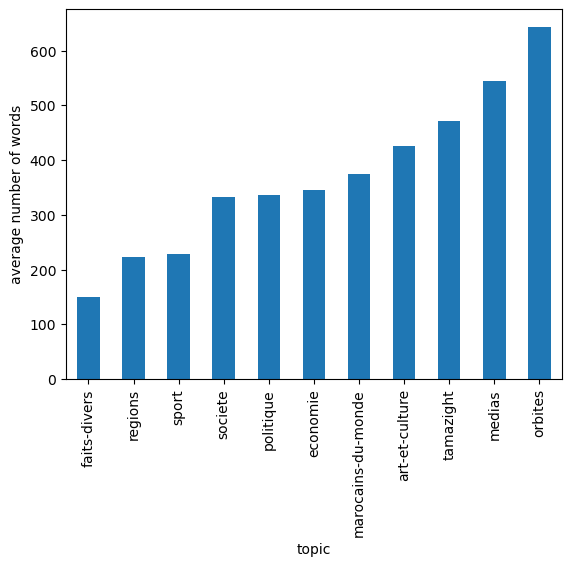

In [46]:
data.groupby("topic").n_words.agg(["mean"]).sort_values("mean").plot(kind="bar")
plt.ylabel("average number of words")
plt.legend().remove()

In [38]:
data.groupby("topic").n_words.agg(["max", "mean", "min"]).sort_values("mean")

,max,mean,min
topic,,,
faits-divers,981,149.244,40
regions,1139,223.271,40
sport,1760,227.919,25
societe,2598,332.185,54
politique,2019,336.223,39
economie,1853,345.076,47
marocains-du-monde,2709,374.791,40
art-et-culture,5920,426.650,40
tamazight,5820,471.819,43
